# CFST Circular Column Strength Prediction 

In [ ]:
# Steps Involved : Data Exploration, Model Tuning, Model Performance Analysis, Inference with SHAP

# Data Exploration

In [1]:
# loading the libraries and dataset 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
df = pd.read_csv('D:\\1 Research Project\\1 Python-Jupyter\\CFST COLOUMN\\circular\\SS CFST Database_Circular.csv')
df.head()



,ID,Material,D,t,L,L/D,Eo,f_0.2,fu,n,fc type,fc_cyl,N_Test,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,C20-50x1.2A,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,Cyl,20.0,106.0,NaN,NaN,NaN,NaN,NaN,NaN
1,C20-50x1.2B,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,Cyl,20.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN
2,C30-50x1.2A,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,Cyl,30.0,134.0,NaN,NaN,NaN,NaN,NaN,NaN
3,C30-50x1.2B,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,Cyl,30.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN
4,C20-50x1.6A,1,50.8,1.6,150.0,2.95,195000,298.0,617.34,7.0,Cyl,20.0,132.0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

df= df[['Material']+['D']+['t']+['L']+['L/D']+['Eo']+['f_0.2']+['fu']+['n']+['fc_cyl']+['N_Test']]


df=df.round(decimals=6)

df.to_csv('test.csv')

df.head()



<ipython-input-2-ae8a1259e903>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Material,D,t,L,L/D,Eo,f_0.2,fu,n,fc_cyl,N_Test
0,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,20.0,106.0
1,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,20.0,112.0
2,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,30.0,134.0
3,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,30.0,130.0
4,1,50.8,1.6,150.0,2.95,195000,298.0,617.34,7.0,20.0,132.0


In [3]:
# seperating the input parameter columns and prediction column
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.mean())

data=df
X = data.loc[:, data.columns != 'N_Test']
y=data['N_Test']
X.head()

,Material,D,t,L,L/D,Eo,f_0.2,fu,n,fc_cyl
0,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,20.0
1,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,20.0
2,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,30.0
3,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,30.0
4,1,50.8,1.6,150.0,2.95,195000,298.0,617.34,7.0,20.0


In [4]:
# checking the dataset if any string values exist
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Material  211 non-null    int64  
 1   D         211 non-null    float64
 2   t         211 non-null    float64
 3   L         211 non-null    float64
 4   L/D       211 non-null    float64
 5   Eo        211 non-null    int64  
 6   f_0.2     211 non-null    float64
 7   fu        211 non-null    float64
 8   n         211 non-null    float64
 9   fc_cyl    211 non-null    float64
 10  N_Test    211 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 18.3 KB


In [5]:
# deleting nulls and spaces
delete = [" "]
df_main = df[~df.isin(delete)]

In [6]:
X.head()

,Material,D,t,L,L/D,Eo,f_0.2,fu,n,fc_cyl
0,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,20.0
1,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,20.0
2,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,30.0
3,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,30.0
4,1,50.8,1.6,150.0,2.95,195000,298.0,617.34,7.0,20.0


In [7]:
# converting data types of some features
convert_dict = {'Eo': float, 
                'Material':float
               }
df_main = df.astype(convert_dict)

df_main = df_main.dropna(axis=0)
print(df_main.shape)

(211, 11)


In [8]:
X.head()

,Material,D,t,L,L/D,Eo,f_0.2,fu,n,fc_cyl
0,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,20.0
1,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,20.0
2,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,30.0
3,1,50.8,1.2,150.0,2.95,195000,291.0,611.25,7.0,30.0
4,1,50.8,1.6,150.0,2.95,195000,298.0,617.34,7.0,20.0


In [9]:
# y axis shows the prediction column 
y.head()

0    106.0
1    112.0
2    134.0
3    130.0
4    132.0
Name: N_Test, dtype: float64

In [10]:
# database size (Number of data, Number of input parameters)
print(data.shape)

(211, 11)


# Selection of Error analysis methods and Cross Validation Technique

In [11]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'RMSE(train)':[],
                           'R-squared (train)':[],
                           'Adj R-squared (train)':[],
                           'MAE (train)':[],
                           'RMSE (test)':[],
                           'R-squared (test)':[],
                           'Adj R-squared (test)':[],
                           'MAE(test)':[],
                           '10-Fold Cross Validation':[]})

evaluation2 = pd.DataFrame({'Model': [],
                           'Test':[],
                           '1':[],
                           '2':[],
                           '3':[],
                           '4':[],
                           '5':[],
                           '6':[],
                           '7':[],
                           '8':[],
                           '9':[],
                           '10':[],
                           'Mean':[]})
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

df= df[['Material']+['D']+['t']+['L']+['L/D']+['Eo']+['f_0.2']+['fu']+['n']+['fc_cyl']+['N_Test']]

features = list(data.columns.values)
print(features)
features=  ['Material']+['D']+['t']+['L']+['L/D']+['Eo']+['f_0.2']+['fu']+['n']+['fc_cyl']+['N_Test']
features2=   ['Material']+['D']+['t']+['L']+['L/D']+['Eo']+['f_0.2']+['fu']+['n']+['fc_cyl']

# random spliting of train and test dataset 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

['Material', 'D', 't', 'L', 'L/D', 'Eo', 'f_0.2', 'fu', 'n', 'fc_cyl', 'N_Test']


In [12]:
y = df["N_Test"]
X = df.drop(["N_Test"],axis=1)

X_scaled = pd.DataFrame(scaler.fit_transform(X),  index=X.index, columns=X.columns)

y = pd.DataFrame(df ['N_Test'])
y_scaled=scaler.fit_transform(y)
y_scaled = pd.DataFrame(y_scaled,index=y.index, columns=y.columns )
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)


# Saving the train dataset and test dataset

In [13]:
df.iloc[X_train.index].to_csv("train_dataset.csv")

In [14]:
df.iloc[X_test.index].to_csv("test_dataset.csv")

# Model Training and Tuning 

## Linear Regression

In [15]:
print("For Linear Regression")
complex_model_1 = linear_model.LinearRegression(normalize=True)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()



r = evaluation2.shape[0]
evaluation2.loc[r] = ['Linear Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['Linear Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['Linear Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['Linear Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['Linear Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['Linear Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['Linear Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['Linear Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['LR','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

For Linear Regression


,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
0,LR,All features,700.777,0.918,0.912,545.293,669.388,0.859,0.815,553.501,0.826


## Ridge Regression

In [16]:
print("For Ridge Regression")
complex_model_1 = linear_model.Ridge(alpha=0.2, random_state=100, normalize=False, fit_intercept= bool)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['ridge Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['ridge Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['ridge Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['ridge Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['ridge Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['ridge Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['ridge Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['ridge Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['RR','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

For Ridge Regression


,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
1,RR,All features,702.708,0.917,0.912,539.604,664.087,0.861,0.818,548.274,0.833
0,LR,All features,700.777,0.918,0.912,545.293,669.388,0.859,0.815,553.501,0.826


## Lasso Regression

In [17]:
print("For LASSO Regression")
complex_model_1 = linear_model.Lasso(alpha= 0.0001)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['LASSO Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['LASSO Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['LASSO Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['LASSO Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['LASSO Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['LASSO Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['LASSO Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['LASSO Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

For LASSO Regression


C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41129184.96882261, tolerance: 100082.54943911907
  model = cd_fast.enet_coordinate_descent(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39174483.86772821, tolerance: 96778.36656504634
  model = cd_fast.enet_coordinate_descent(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36274424.269727886, tolerance: 96146.30259552317
  model = cd_fast.enet_coordinate_descent(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packa

C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38214476.866407186, tolerance: 98447.87047283554
  model = cd_fast.enet_coordinate_descent(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39174483.86772821, tolerance: 96778.36656504634
  model = cd_fast.enet_coordinate_descent(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36274424.269727886, tolerance: 96146.30259552317
  model = cd_fast.enet_coordinate_descent(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packa

C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33883351.48053427, tolerance: 85291.10481774836
  model = cd_fast.enet_coordinate_descent(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36725327.88685615, tolerance: 83241.30118597351
  model = cd_fast.enet_coordinate_descent(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38324408.481341764, tolerance: 89963.35165892715
  model = cd_fast.enet_coordinate_descent(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packag

C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4042870.52608877, tolerance: 13485.22703897436
  model = cd_fast.enet_coordinate_descent(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3971140.148613866, tolerance: 13578.152764974362
  model = cd_fast.enet_coordinate_descent(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4205100.757826882, tolerance: 13515.622453589742
  model = cd_fast.enet_coordinate_descent(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packag

C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001869.9671081067, tolerance: 13398.559333263158
  model = cd_fast.enet_coordinate_descent(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85741.08891622865, tolerance: 1099.7313328421055
  model = cd_fast.enet_coordinate_descent(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4322601.67897649, tolerance: 13486.79481255263
  model = cd_fast.enet_coordinate_descent(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packa

C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4075776.744788683, tolerance: 13418.590960769232
  model = cd_fast.enet_coordinate_descent(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4475250.370743381, tolerance: 13518.112341897431
  model = cd_fast.enet_coordinate_descent(


,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
1,RR,All features,702.708,0.917,0.912,539.604,664.087,0.861,0.818,548.274,0.833
0,LR,All features,700.777,0.918,0.912,545.293,669.388,0.859,0.815,553.501,0.826
2,Lasso,All features,700.794,0.918,0.912,545.057,669.888,0.859,0.815,553.592,0.826


## K- nearest Neighbors

In [18]:
print("For KNN Regression")
complex_model_1 = KNeighborsRegressor(n_neighbors=1, weights='distance', algorithm='auto')
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()



r = evaluation2.shape[0]
evaluation2.loc[r] = ['kNN Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['kNN Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['kNN Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['kNN Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['kNN Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['kNN Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['kNN Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['kNN Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]


r = evaluation.shape[0]
evaluation.loc[r] = ['KNN','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

For KNN Regression


,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
3,KNN,All features,138.616,0.997,0.997,18.199,173.544,0.991,0.988,91.933,0.956
1,RR,All features,702.708,0.917,0.912,539.604,664.087,0.861,0.818,548.274,0.833
0,LR,All features,700.777,0.918,0.912,545.293,669.388,0.859,0.815,553.501,0.826
2,Lasso,All features,700.794,0.918,0.912,545.057,669.888,0.859,0.815,553.592,0.826


## Support Vector Regression

In [19]:
print("For SVR ")
from sklearn.svm import SVR
complex_model_1 = SVR( C=50, degree=1)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)

rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()



r = evaluation2.shape[0]
evaluation2.loc[r] = ['SVR','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['SVR','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['SVR','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['SVR','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['SVR','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['SVR','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['SVR','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['SVR','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['SVR','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

For SVR 


,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
3,KNN,All features,138.616,0.997,0.997,18.199,173.544,0.991,0.988,91.933,0.956
1,RR,All features,702.708,0.917,0.912,539.604,664.087,0.861,0.818,548.274,0.833
0,LR,All features,700.777,0.918,0.912,545.293,669.388,0.859,0.815,553.501,0.826
2,Lasso,All features,700.794,0.918,0.912,545.057,669.888,0.859,0.815,553.592,0.826
4,SVR,All features,2268.229,0.136,0.081,858.455,1610.979,0.184,-0.070,460.862,0.187


## Decision Tree Regression

In [20]:
print("For Decision Tree regression")
from sklearn.tree import DecisionTreeRegressor
complex_model_1 = DecisionTreeRegressor(random_state=5000)
complex_model_1.fit(X_train, y_train)


pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()



r = evaluation2.shape[0]
evaluation2.loc[r] = ['DT','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['DT','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['DT','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['DT','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['DT','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['DT','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['DT','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['DT','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['DT','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

For Decision Tree regression


,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
3,KNN,All features,138.616,0.997,0.997,18.199,173.544,0.991,0.988,91.933,0.956
5,DT,All features,98.024,0.998,0.998,18.237,177.591,0.990,0.987,90.542,0.954
1,RR,All features,702.708,0.917,0.912,539.604,664.087,0.861,0.818,548.274,0.833
0,LR,All features,700.777,0.918,0.912,545.293,669.388,0.859,0.815,553.501,0.826
2,Lasso,All features,700.794,0.918,0.912,545.057,669.888,0.859,0.815,553.592,0.826
4,SVR,All features,2268.229,0.136,0.081,858.455,1610.979,0.184,-0.070,460.862,0.187


## Random Forest Regression

In [21]:
print("For Random Forest regression")
from sklearn.ensemble import RandomForestRegressor
complex_model_1 = RandomForestRegressor(random_state=2, n_estimators=1)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['RF','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['RF','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['RF','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['RF','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['RF','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['RF','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['RF','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['RF','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]


r = evaluation.shape[0]
evaluation.loc[r] = ['RF','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

For Random Forest regression


,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
3,KNN,All features,138.616,0.997,0.997,18.199,173.544,0.991,0.988,91.933,0.956
5,DT,All features,98.024,0.998,0.998,18.237,177.591,0.990,0.987,90.542,0.954
6,RF,All features,251.670,0.989,0.989,72.905,217.857,0.985,0.980,123.135,0.941
1,RR,All features,702.708,0.917,0.912,539.604,664.087,0.861,0.818,548.274,0.833
0,LR,All features,700.777,0.918,0.912,545.293,669.388,0.859,0.815,553.501,0.826
2,Lasso,All features,700.794,0.918,0.912,545.057,669.888,0.859,0.815,553.592,0.826
4,SVR,All features,2268.229,0.136,0.081,858.455,1610.979,0.184,-0.070,460.862,0.187


For permutation feature importance for Random Forest

## Install XG Boost Regression

In [ ]:
!pip install xgboost

## XG Boost Regression

In [13]:
print("For XGBoost regression")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import xgboost as xgb
from xgboost import plot_importance
complex_model_1 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=3)

complex_model_1.fit(X_train, y_train)
testing=pd.read_csv('D:\\1 Research Project\\Paper on Gueest Plate Buckling\\Code\\Gusset plate database.csv');
pred2=complex_model_1.predict(X_test)



pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()



r = evaluation2.shape[0]
evaluation2.loc[r] = ['XGBOOST Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['XGBOOST Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['XGBOOST Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['XGBOOST Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['XGBOOST Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['XGBOOST Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['XGBOOST Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['XGBOOST Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['XB','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

For XGBoost regression


,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
0,XB,All features,114.757,0.998,0.998,59.445,172.491,0.991,0.988,99.804,0.978


In [14]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('XgBOOST_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('XgBOOST_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('XgBOOST_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('XgBOOST_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('XgBOOST_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('XgBOOST_entire_actual.csv', y, delimiter=',', fmt='%s')

In [15]:
# Explore SHAP for feature importance and result analysis
import shap
complex_model_1_explainer = shap.KernelExplainer(complex_model_1.predict,X_train)
complex_model_1_shap_values = complex_model_1_explainer.shap_values(X_train)

Using 168 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/168 [00:00<?, ?it/s]

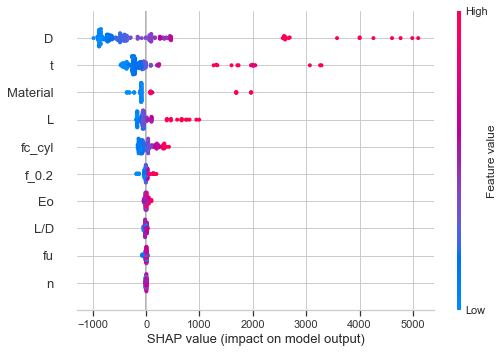

In [16]:
# SHAP summary_plot for Global interpretability explanation 
shap.summary_plot(complex_model_1_shap_values, X_train)

In [17]:
# SHAP summary_plot for Local interpretability explanation
shap.initjs()
shap.force_plot(complex_model_1_explainer.expected_value,complex_model_1_shap_values[0,:], X_test.iloc[0,:])

## ADABoost REGRESSION

In [23]:
from sklearn.ensemble import AdaBoostRegressor
print("For Adaboost regression")
complex_model_1 = AdaBoostRegressor(random_state=30, n_estimators=50)
complex_model_1.fit(X_train, y_train)


pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['ADABOOST Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['ADABOOST Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['ADABOOST Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['ADABOOST Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['ADABOOST Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['ADABOOST Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['ADABOOST Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['ADABOOST Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['AdaBoost','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

For Adaboost regression


,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
7,XB,All features,114.757,0.998,0.998,59.445,172.491,0.991,0.988,99.804,0.978
3,KNN,All features,138.616,0.997,0.997,18.199,173.544,0.991,0.988,91.933,0.956
5,DT,All features,98.024,0.998,0.998,18.237,177.591,0.990,0.987,90.542,0.954
8,AdaBoost,All features,246.650,0.990,0.989,186.858,298.898,0.972,0.963,252.597,0.954
6,RF,All features,251.670,0.989,0.989,72.905,217.857,0.985,0.980,123.135,0.941
1,RR,All features,702.708,0.917,0.912,539.604,664.087,0.861,0.818,548.274,0.833
0,LR,All features,700.777,0.918,0.912,545.293,669.388,0.859,0.815,553.501,0.826
2,Lasso,All features,700.794,0.918,0.912,545.057,669.888,0.859,0.815,553.592,0.826
4,SVR,All features,2268.229,0.136,0.081,858.455,1610.979,0.184,-0.070,460.862,0.187


## Install CATBoost REGRESSION

In [ ]:
print("For CatBoost regression")
!pip3 install catboost


## CATBoost REGRESSION

In [18]:
from catboost import CatBoostRegressor,Pool
print("For CatBoost regression")
complex_model_1 = CatBoostRegressor(iterations=700,learning_rate=0.02,depth=5,eval_metric='RMSE',random_seed = 23,bagging_temperature = 0.2,od_type='Iter',
                             metric_period = 75,
                             od_wait=100)

complex_model_1.fit(X_train, y_train)
pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['CATBOOST','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['CATBOOST','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['CATBOOST','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['CATBOOST','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['CATBOOST','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['CATBOOST','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['CATBOOST','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['CATBOOST','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['CB','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

For CatBoost regression
0:	learn: 2411.0223340	total: 149ms	remaining: 1m 44s
75:	learn: 942.8694106	total: 188ms	remaining: 1.54s
150:	learn: 464.4596367	total: 226ms	remaining: 821ms
225:	learn: 277.1672847	total: 262ms	remaining: 550ms
300:	learn: 192.5289045	total: 299ms	remaining: 397ms
375:	learn: 152.6553053	total: 337ms	remaining: 291ms
450:	learn: 135.8499521	total: 377ms	remaining: 208ms
525:	learn: 125.9296145	total: 416ms	remaining: 137ms
600:	learn: 120.3142302	total: 452ms	remaining: 74.5ms
675:	learn: 115.9968315	total: 489ms	remaining: 17.4ms
699:	learn: 115.0503519	total: 501ms	remaining: 0us
0:	learn: 2496.3649468	total: 728us	remaining: 510ms
75:	learn: 989.5481161	total: 38.3ms	remaining: 315ms
150:	learn: 495.1236151	total: 77ms	remaining: 280ms
225:	learn: 287.9805404	total: 115ms	remaining: 241ms
300:	learn: 188.1051003	total: 153ms	remaining: 202ms
375:	learn: 139.4250652	total: 191ms	remaining: 165ms
450:	learn: 116.1015207	total: 230ms	remaining: 127ms
525:	le

0:	learn: 2345.7287931	total: 786us	remaining: 550ms
75:	learn: 979.3768680	total: 42.7ms	remaining: 351ms
150:	learn: 495.0066626	total: 103ms	remaining: 373ms
225:	learn: 306.2020739	total: 143ms	remaining: 301ms
300:	learn: 214.5523871	total: 186ms	remaining: 246ms
375:	learn: 168.2891012	total: 225ms	remaining: 194ms
450:	learn: 144.9026413	total: 262ms	remaining: 145ms
525:	learn: 131.7201902	total: 298ms	remaining: 98.7ms
600:	learn: 123.7786549	total: 335ms	remaining: 55.1ms
675:	learn: 119.5626501	total: 371ms	remaining: 13.2ms
699:	learn: 118.7642868	total: 384ms	remaining: 0us
0:	learn: 2317.5257157	total: 662us	remaining: 463ms
75:	learn: 974.4758997	total: 36.1ms	remaining: 297ms
150:	learn: 481.3211380	total: 72.9ms	remaining: 265ms
225:	learn: 282.2201080	total: 111ms	remaining: 233ms
300:	learn: 190.5068589	total: 147ms	remaining: 195ms
375:	learn: 150.3563618	total: 184ms	remaining: 159ms
450:	learn: 134.0801327	total: 221ms	remaining: 122ms
525:	learn: 124.3564251	tota

675:	learn: 121.7403701	total: 427ms	remaining: 15.1ms
699:	learn: 120.6757182	total: 440ms	remaining: 0us
0:	learn: 2150.3423067	total: 642us	remaining: 449ms
75:	learn: 900.1114291	total: 42.8ms	remaining: 351ms
150:	learn: 446.4997778	total: 83.8ms	remaining: 305ms
225:	learn: 294.4951840	total: 125ms	remaining: 263ms
300:	learn: 235.4378917	total: 163ms	remaining: 216ms
375:	learn: 197.6272270	total: 201ms	remaining: 173ms
450:	learn: 168.3136203	total: 236ms	remaining: 131ms
525:	learn: 148.4307843	total: 275ms	remaining: 90.9ms
600:	learn: 134.6626754	total: 313ms	remaining: 51.6ms
675:	learn: 127.1387245	total: 366ms	remaining: 13ms
699:	learn: 125.4634322	total: 377ms	remaining: 0us
0:	learn: 2496.2623041	total: 663us	remaining: 464ms
75:	learn: 1005.5266455	total: 37.7ms	remaining: 310ms
150:	learn: 494.5278042	total: 75.1ms	remaining: 273ms
225:	learn: 290.4348128	total: 115ms	remaining: 241ms
300:	learn: 193.6967591	total: 151ms	remaining: 200ms
375:	learn: 148.4145480	total

675:	learn: 88.2681869	total: 435ms	remaining: 15.4ms
699:	learn: 86.7949493	total: 447ms	remaining: 0us
0:	learn: 2488.2940297	total: 796us	remaining: 556ms
75:	learn: 1003.9140061	total: 39ms	remaining: 321ms
150:	learn: 506.1655613	total: 78.3ms	remaining: 285ms
225:	learn: 296.6740454	total: 121ms	remaining: 254ms
300:	learn: 197.3689230	total: 181ms	remaining: 240ms
375:	learn: 152.0001863	total: 229ms	remaining: 197ms
450:	learn: 133.1784356	total: 280ms	remaining: 154ms
525:	learn: 120.8863076	total: 327ms	remaining: 108ms
600:	learn: 113.8385085	total: 375ms	remaining: 61.8ms
675:	learn: 109.1808838	total: 424ms	remaining: 15ms
699:	learn: 107.8833441	total: 439ms	remaining: 0us
0:	learn: 2433.5114813	total: 11.7ms	remaining: 8.16s
75:	learn: 994.0214780	total: 70.5ms	remaining: 579ms
150:	learn: 489.3814409	total: 116ms	remaining: 421ms
225:	learn: 286.0788124	total: 160ms	remaining: 335ms
300:	learn: 186.0898799	total: 201ms	remaining: 266ms
375:	learn: 140.2240443	total: 248

675:	learn: 116.4716136	total: 424ms	remaining: 15.1ms
699:	learn: 115.5659005	total: 446ms	remaining: 0us
0:	learn: 2408.2592027	total: 945us	remaining: 661ms
75:	learn: 993.7224984	total: 42ms	remaining: 345ms
150:	learn: 503.5121783	total: 79.4ms	remaining: 289ms
225:	learn: 298.4816391	total: 122ms	remaining: 255ms
300:	learn: 200.8484328	total: 180ms	remaining: 239ms
375:	learn: 155.4209758	total: 242ms	remaining: 208ms
450:	learn: 135.8172521	total: 294ms	remaining: 163ms
525:	learn: 126.6989953	total: 340ms	remaining: 112ms
600:	learn: 120.8967784	total: 385ms	remaining: 63.4ms
675:	learn: 117.4093576	total: 426ms	remaining: 15.1ms
699:	learn: 116.6423519	total: 439ms	remaining: 0us
0:	learn: 2403.3914315	total: 670us	remaining: 469ms
75:	learn: 973.2804631	total: 39.5ms	remaining: 324ms
150:	learn: 493.2747317	total: 78ms	remaining: 284ms
225:	learn: 295.4563248	total: 118ms	remaining: 248ms
300:	learn: 199.7410695	total: 156ms	remaining: 206ms
375:	learn: 158.3359983	total: 20

699:	learn: 105.6544454	total: 394ms	remaining: 0us
0:	learn: 2510.2185180	total: 1.18ms	remaining: 824ms
75:	learn: 997.9166507	total: 37.8ms	remaining: 310ms
150:	learn: 492.5006989	total: 75.1ms	remaining: 273ms
225:	learn: 288.7069957	total: 115ms	remaining: 241ms
300:	learn: 195.1652660	total: 156ms	remaining: 207ms
375:	learn: 154.5078610	total: 196ms	remaining: 169ms
450:	learn: 136.9614565	total: 237ms	remaining: 131ms
525:	learn: 126.9091420	total: 278ms	remaining: 91.9ms
600:	learn: 120.4077979	total: 317ms	remaining: 52.3ms
675:	learn: 117.7776942	total: 357ms	remaining: 12.7ms
699:	learn: 116.9381533	total: 369ms	remaining: 0us
0:	learn: 2496.3649468	total: 613us	remaining: 429ms
75:	learn: 989.5481161	total: 39.3ms	remaining: 323ms
150:	learn: 495.1236151	total: 78ms	remaining: 283ms
225:	learn: 287.9805404	total: 116ms	remaining: 243ms
300:	learn: 188.1051003	total: 154ms	remaining: 204ms
375:	learn: 139.4250652	total: 196ms	remaining: 169ms
450:	learn: 116.1015207	total:

699:	learn: 87.3379806	total: 423ms	remaining: 0us
0:	learn: 2345.7287931	total: 637us	remaining: 446ms
75:	learn: 979.3768680	total: 46ms	remaining: 378ms
150:	learn: 495.0066626	total: 85.4ms	remaining: 310ms
225:	learn: 306.2020739	total: 127ms	remaining: 266ms
300:	learn: 214.5523871	total: 167ms	remaining: 221ms
375:	learn: 168.2891012	total: 210ms	remaining: 181ms
450:	learn: 144.9026413	total: 251ms	remaining: 139ms
525:	learn: 131.7201902	total: 297ms	remaining: 98.3ms
600:	learn: 123.7786549	total: 341ms	remaining: 56.2ms
675:	learn: 119.5626501	total: 390ms	remaining: 13.8ms
699:	learn: 118.7642868	total: 406ms	remaining: 0us
0:	learn: 2317.5257157	total: 1.49ms	remaining: 1.04s
75:	learn: 974.4758997	total: 40.9ms	remaining: 336ms
150:	learn: 481.3211380	total: 84.5ms	remaining: 307ms
225:	learn: 282.2201080	total: 125ms	remaining: 262ms
300:	learn: 190.5068589	total: 166ms	remaining: 220ms
375:	learn: 150.3563618	total: 217ms	remaining: 187ms
450:	learn: 134.0801327	total: 

0:	learn: 1851.7151316	total: 552us	remaining: 386ms
75:	learn: 1266.5285109	total: 33.6ms	remaining: 276ms
150:	learn: 876.9645205	total: 63.6ms	remaining: 231ms
225:	learn: 616.0989277	total: 93.3ms	remaining: 196ms
300:	learn: 445.6543508	total: 120ms	remaining: 159ms
375:	learn: 324.3981029	total: 148ms	remaining: 128ms
450:	learn: 240.9580635	total: 183ms	remaining: 101ms
525:	learn: 173.4186663	total: 217ms	remaining: 71.9ms
600:	learn: 128.5432142	total: 247ms	remaining: 40.7ms
675:	learn: 95.0563834	total: 279ms	remaining: 9.9ms
699:	learn: 86.9993790	total: 289ms	remaining: 0us
0:	learn: 1845.1542306	total: 598us	remaining: 418ms
75:	learn: 1263.5669221	total: 30.4ms	remaining: 250ms
150:	learn: 871.1153242	total: 60.7ms	remaining: 221ms
225:	learn: 612.6453817	total: 90.3ms	remaining: 189ms
300:	learn: 437.8200930	total: 118ms	remaining: 157ms
375:	learn: 317.7183179	total: 146ms	remaining: 126ms
450:	learn: 240.2292074	total: 177ms	remaining: 98ms
525:	learn: 179.2062096	tot

0:	learn: 533.2475852	total: 685us	remaining: 479ms
75:	learn: 289.9335610	total: 33.9ms	remaining: 279ms
150:	learn: 168.1583132	total: 65.8ms	remaining: 239ms
225:	learn: 102.9047481	total: 98ms	remaining: 205ms
300:	learn: 65.3190208	total: 131ms	remaining: 173ms
375:	learn: 43.5196656	total: 160ms	remaining: 138ms
450:	learn: 34.2987516	total: 193ms	remaining: 107ms
525:	learn: 25.6459552	total: 240ms	remaining: 79.5ms
600:	learn: 19.2754310	total: 272ms	remaining: 44.8ms
675:	learn: 15.4031803	total: 308ms	remaining: 10.9ms
699:	learn: 14.6760292	total: 323ms	remaining: 0us
0:	learn: 1873.6503826	total: 630us	remaining: 441ms
75:	learn: 1280.8352890	total: 36.7ms	remaining: 301ms
150:	learn: 886.3546445	total: 73.9ms	remaining: 269ms
225:	learn: 623.5216400	total: 108ms	remaining: 226ms
300:	learn: 451.3860167	total: 149ms	remaining: 198ms
375:	learn: 329.0577718	total: 180ms	remaining: 155ms
450:	learn: 245.6469066	total: 232ms	remaining: 128ms
525:	learn: 176.9378968	total: 268m

0:	learn: 1849.7885086	total: 717us	remaining: 502ms
75:	learn: 1262.6448936	total: 34.5ms	remaining: 283ms
150:	learn: 876.7160541	total: 65.2ms	remaining: 237ms
225:	learn: 620.2765112	total: 95ms	remaining: 199ms
300:	learn: 447.0736006	total: 124ms	remaining: 164ms
375:	learn: 325.5450697	total: 154ms	remaining: 133ms
450:	learn: 243.5901475	total: 187ms	remaining: 103ms
525:	learn: 173.3597417	total: 221ms	remaining: 73.1ms
600:	learn: 125.0203192	total: 259ms	remaining: 42.6ms
675:	learn: 93.7649288	total: 306ms	remaining: 10.9ms
699:	learn: 85.6833197	total: 319ms	remaining: 0us
0:	learn: 1856.2341643	total: 1.12ms	remaining: 782ms
75:	learn: 1267.8926700	total: 43.4ms	remaining: 356ms
150:	learn: 875.3488455	total: 81.4ms	remaining: 296ms
225:	learn: 612.6995469	total: 119ms	remaining: 250ms
300:	learn: 440.4042203	total: 157ms	remaining: 208ms
375:	learn: 319.5504612	total: 192ms	remaining: 165ms
450:	learn: 235.7421974	total: 230ms	remaining: 127ms
525:	learn: 170.7763980	tot

0:	learn: 1851.8238220	total: 553us	remaining: 387ms
75:	learn: 1264.5499194	total: 33.5ms	remaining: 275ms
150:	learn: 877.4766554	total: 62.4ms	remaining: 227ms
225:	learn: 613.9311314	total: 93.3ms	remaining: 196ms
300:	learn: 438.2433261	total: 124ms	remaining: 164ms
375:	learn: 317.1897770	total: 153ms	remaining: 132ms
450:	learn: 239.7065851	total: 184ms	remaining: 101ms
525:	learn: 178.9560951	total: 216ms	remaining: 71.3ms
600:	learn: 134.3650001	total: 250ms	remaining: 41.1ms
675:	learn: 100.8121095	total: 296ms	remaining: 10.5ms
699:	learn: 91.9020722	total: 313ms	remaining: 0us
0:	learn: 1867.5243863	total: 779us	remaining: 545ms
75:	learn: 1276.7781987	total: 34.8ms	remaining: 286ms
150:	learn: 884.6246966	total: 70.7ms	remaining: 257ms
225:	learn: 622.4720908	total: 102ms	remaining: 213ms
300:	learn: 447.0935090	total: 148ms	remaining: 197ms
375:	learn: 325.6438924	total: 179ms	remaining: 154ms
450:	learn: 241.3103723	total: 211ms	remaining: 117ms
525:	learn: 179.2195094	t

0:	learn: 1861.1265183	total: 690us	remaining: 483ms
75:	learn: 1272.6698231	total: 31.8ms	remaining: 261ms
150:	learn: 884.8592775	total: 65.7ms	remaining: 239ms
225:	learn: 622.1818206	total: 95.4ms	remaining: 200ms
300:	learn: 448.5593540	total: 128ms	remaining: 170ms
375:	learn: 323.0665971	total: 163ms	remaining: 141ms
450:	learn: 239.3240629	total: 202ms	remaining: 112ms
525:	learn: 172.4781956	total: 238ms	remaining: 78.6ms
600:	learn: 124.9476765	total: 272ms	remaining: 44.8ms
675:	learn: 92.9933191	total: 314ms	remaining: 11.1ms
699:	learn: 85.3007941	total: 327ms	remaining: 0us
0:	learn: 1854.8972221	total: 586us	remaining: 410ms
75:	learn: 1264.2523495	total: 32ms	remaining: 263ms
150:	learn: 875.5522269	total: 63.8ms	remaining: 232ms
225:	learn: 613.4582186	total: 93.7ms	remaining: 196ms
300:	learn: 439.8213117	total: 127ms	remaining: 168ms
375:	learn: 324.4147091	total: 156ms	remaining: 135ms
450:	learn: 238.3742424	total: 187ms	remaining: 103ms
525:	learn: 170.4516171	tot

0:	learn: 1851.7151316	total: 599us	remaining: 419ms
75:	learn: 1266.5285109	total: 34ms	remaining: 279ms
150:	learn: 876.9645205	total: 64.4ms	remaining: 234ms
225:	learn: 616.0989277	total: 94.6ms	remaining: 198ms
300:	learn: 445.6543508	total: 122ms	remaining: 162ms
375:	learn: 324.3981029	total: 154ms	remaining: 133ms
450:	learn: 240.9580635	total: 190ms	remaining: 105ms
525:	learn: 173.4186663	total: 220ms	remaining: 72.9ms
600:	learn: 128.5432142	total: 253ms	remaining: 41.7ms
675:	learn: 95.0563834	total: 287ms	remaining: 10.2ms
699:	learn: 86.9993790	total: 299ms	remaining: 0us
0:	learn: 1845.1542306	total: 517us	remaining: 362ms
75:	learn: 1263.5669221	total: 28.2ms	remaining: 231ms
150:	learn: 871.1153242	total: 58ms	remaining: 211ms
225:	learn: 612.6453817	total: 85.3ms	remaining: 179ms
300:	learn: 437.8200930	total: 136ms	remaining: 180ms
375:	learn: 317.7183179	total: 166ms	remaining: 143ms
450:	learn: 240.2292074	total: 198ms	remaining: 110ms
525:	learn: 179.2062096	total

,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
0,XB,All features,114.757,0.998,0.998,59.445,172.491,0.991,0.988,99.804,0.978
1,CB,All features,115.050,0.998,0.998,62.249,146.125,0.993,0.991,93.136,0.976


In [19]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('CatBOOST_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('CatBOOST_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('CatBOOST_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('CatBOOST_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('CatBOOST_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('CatBOOST_entire_actual.csv', y, delimiter=',', fmt='%s')

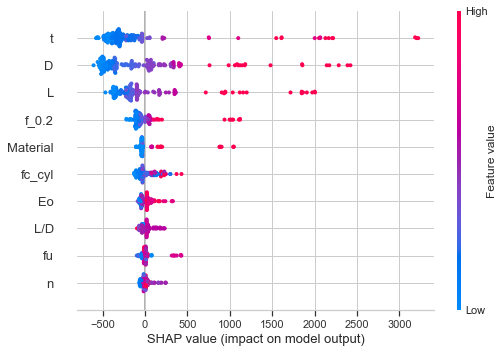

In [20]:
# Explore SHAP for feature importance and result analysis
# SHAP summary_plot for Global interpretability explanation
import shap
shap_values = complex_model_1.get_feature_importance(Pool(X_train, label=y_train) , type="ShapValues")
 
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_train.iloc[0,:])
shap.summary_plot(shap_values, X_train)

In [21]:
complex_model_1_explainer = shap.KernelExplainer(complex_model_1.predict,X_train)
complex_model_1_shap_values = complex_model_1_explainer.shap_values(X_train)

Using 168 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/168 [00:00<?, ?it/s]

In [22]:
# SHAP summary_plot for Local interpretability explanation
shap.force_plot(complex_model_1_explainer.expected_value,complex_model_1_shap_values[0,:], X_train.iloc[0,:])

## Saving the model performance results

In [25]:
evaluation.to_csv("model_performance_results.csv")
evaluation2.to_csv("model_cross_val_results.csv")

## After evaluating the model performances, CATBoost has the heighest prediction accuracy.